#**Boosting**


### **1. What is Boosting in Machine Learning?**

Boosting is an **ensemble technique** that combines multiple **weak learners** (usually decision trees) to form a **strong learner**. It builds models **sequentially**, where each new model tries to correct the errors of the previous ones.

---

### **2. How does Boosting differ from Bagging?**

| Feature        | Bagging                    | Boosting                     |
| -------------- | -------------------------- | ---------------------------- |
| Model Building | Parallel                   | Sequential                   |
| Focus          | Reducing variance          | Reducing bias                |
| Example        | Random Forest              | AdaBoost, Gradient Boosting  |
| Weighting      | Equal weight to all models | More weight to better models |

---

### **3. What is the key idea behind AdaBoost?**

AdaBoost focuses on **hard-to-predict samples**. It assigns **more weight** to wrongly classified samples so that the next model focuses more on them. Final prediction is a **weighted vote** of all models.

---

### **4. Explain the working of AdaBoost with an example**

Suppose you have 5 samples and want to classify them:

1. Start with equal weights for all samples.
2. Train a weak learner (e.g., a small decision tree).
3. If the model misclassifies samples, increase the weights of those misclassified samples.
4. Train the next model on this updated dataset.
5. Repeat steps 2–4 for a few rounds.
6. Final prediction = weighted majority vote of all models.

🧠 **Key idea**: Later models focus on fixing earlier mistakes.

---

### **5. What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting also builds models **sequentially**, but instead of focusing on misclassified points (like AdaBoost), it tries to **minimize a loss function** (e.g., MSE, Log Loss) using **gradient descent**.

**Main Difference:**

* AdaBoost: Adjusts sample weights.
* Gradient Boosting: Fits on the **residual errors** using gradient updates.

---

### **6. What is the loss function in Gradient Boosting?**

It depends on the task:

* Regression → Mean Squared Error (MSE)
* Classification → Log Loss or Cross-Entropy
  Gradient Boosting minimizes this loss **iteratively** using gradients.

---

### **7. How does XGBoost improve over traditional Gradient Boosting?**

**XGBoost** (Extreme Gradient Boosting) offers:

* **Regularization** (to prevent overfitting)
* **Tree pruning**
* **Parallel processing**
* **Handling missing values**
* **Better speed & memory efficiency**

---

### **8. What is the difference between XGBoost and CatBoost?**

| Feature          | XGBoost                              | CatBoost                               |
| ---------------- | ------------------------------------ | -------------------------------------- |
| Categorical Data | Must encode manually (e.g., One-Hot) | Handles categorical data **natively**  |
| Training Speed   | Fast                                 | Slightly slower but more automated     |
| Accuracy         | High                                 | Often higher with categorical features |
| Ease of Use      | Needs preprocessing                  | Less preprocessing                     |

---

### **9. What are some real-world applications of Boosting techniques?**

* **Fraud detection** (banks, credit cards)
* **Customer churn prediction**
* **Click-through rate (CTR) prediction**
* **Medical diagnosis**
* **Stock price prediction**
* **Face detection (AdaBoost in Viola-Jones algorithm)**

---

### **10. How does regularization help in XGBoost?**

Regularization (using **L1** and **L2** terms) in XGBoost:

* Penalizes complex trees
* Avoids overfitting
* Improves generalization
  It controls the model complexity through parameters like `lambda` (L2) and `alpha` (L1).

---

### **11. What are some hyperparameters to tune in Gradient Boosting models?**

* `n_estimators`: Number of trees
* `learning_rate`: How much each tree contributes
* `max_depth`: Depth of each tree
* `subsample`: % of samples used per tree
* `colsample_bytree`: % of features used per tree
* `min_child_weight`: Minimum data points in a leaf
* `gamma`: Minimum loss reduction to make a split

---

### **12. What is the concept of Feature Importance in Boosting?**

Feature importance tells us **which features** are most useful for the model.
In boosting, it is calculated using:

* **Gain**: How much a feature reduces loss
* **Cover**: How often a feature is used in trees
* **Frequency**: How many times a feature appears

Used for **feature selection** and understanding the model.

---

### **13. Why is CatBoost efficient for categorical data?**

CatBoost:

* Handles categorical variables **automatically**
* Uses a technique called **Ordered Target Encoding**, which prevents **data leakage**
* Reduces the need for one-hot encoding or label encoding
* Works well even with many categorical features and low data size



#**Practical**

In [1]:
#Q.14 Train an AdaBoost Classifier on a sample dataset and print model accuracy?

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           random_state=42)

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 3: Create and train the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


In [2]:
#Q.15 Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)?

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 3: Create and train the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 76.62


Top 10 Important Features:
                 Feature  Importance
7    mean concave points    0.450528
27  worst concave points    0.240103
20          worst radius    0.075589
22       worst perimeter    0.051408
21         worst texture    0.039886
23            worst area    0.038245
1           mean texture    0.027805
26       worst concavity    0.018725
16       concavity error    0.013068
13            area error    0.008415


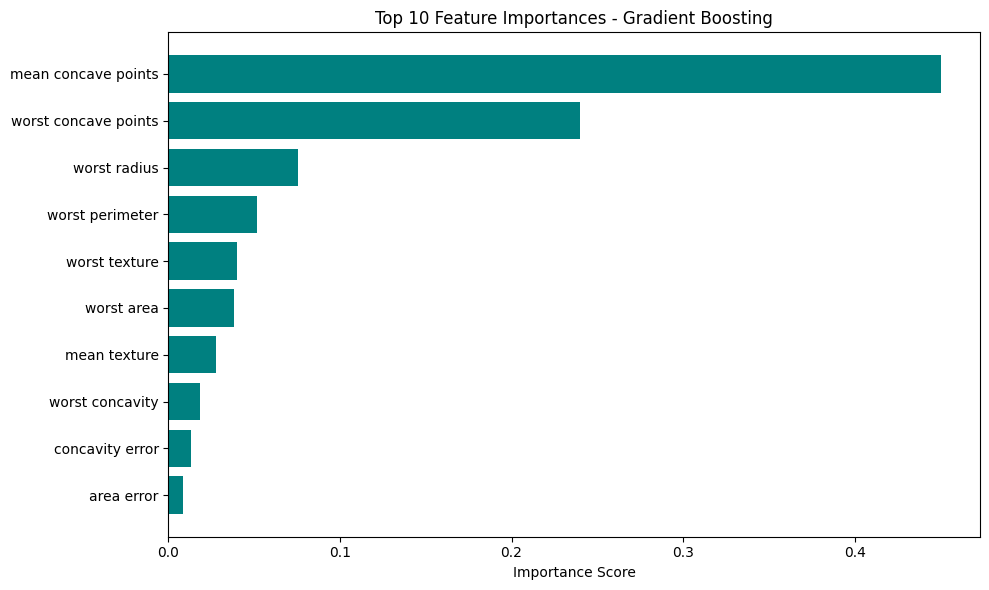

In [3]:
#Q.16 Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance ?

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_

# Convert to pandas for easy handling
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 features
print("Top 10 Important Features:")
print(importance_df.head(10))

# Step 5: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='teal')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [4]:
#Q.17 Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score: {:.4f}".format(r2))


R-squared Score: 0.7756


In [7]:
#Q.18 Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           random_state=42)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 3: Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

# Step 4: Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Step 5: Compare accuracy
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")
print(f"XGBoost Accuracy: {xgb_acc:.2f}")



SyntaxError: invalid syntax (ipython-input-7-3868810705.py, line 3)

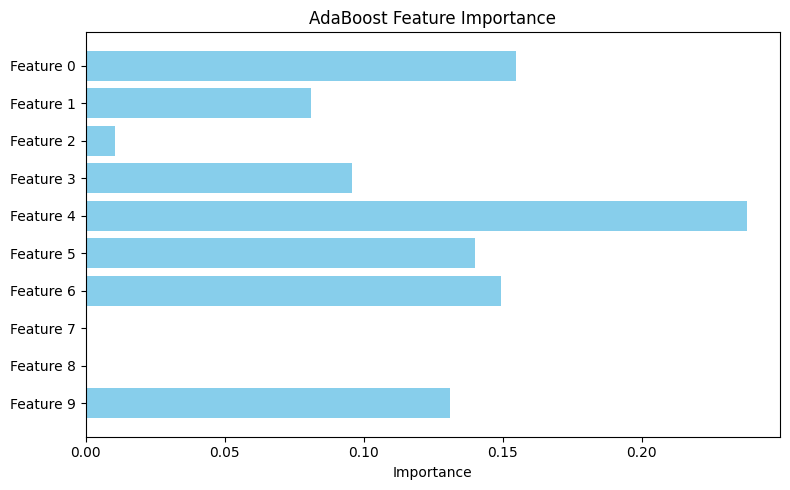

In [10]:
#Q.19 Train an AdaBoost Classifier and visualize feature importance ?

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 3: Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Step 5: Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('AdaBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




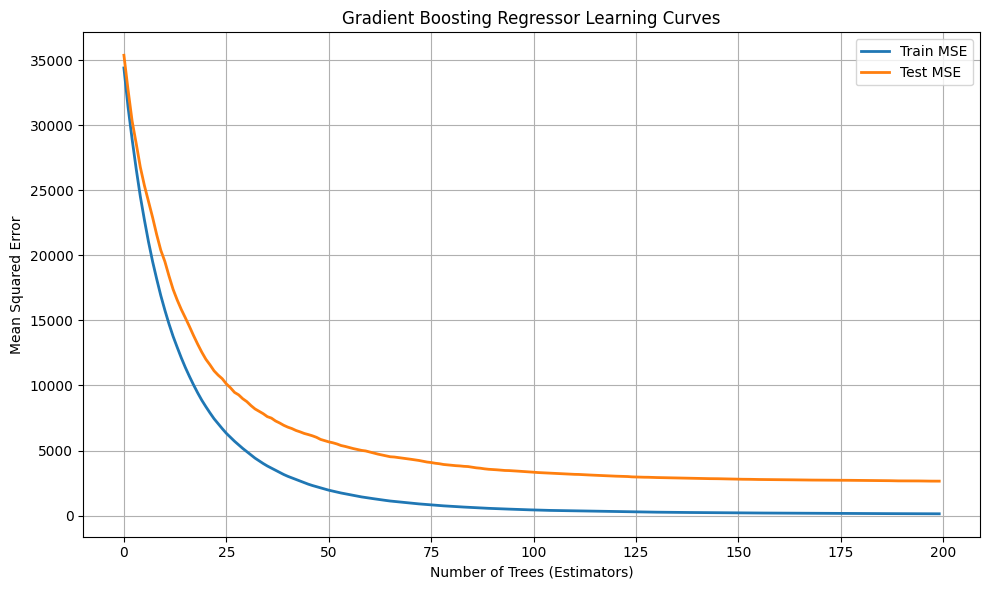

In [12]:
#Q.20  Train a Gradient Boosting Regressor and plot learning curves ?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create synthetic regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Step 4: Collect training and test MSE for each stage
train_errors = []
test_errors = []

for y_train_pred in gbr.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_train_pred))

for y_test_pred in gbr.staged_predict(X_test):
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Step 5: Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Train MSE", linewidth=2)
plt.plot(test_errors, label="Test MSE", linewidth=2)
plt.xlabel("Number of Trees (Estimators)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

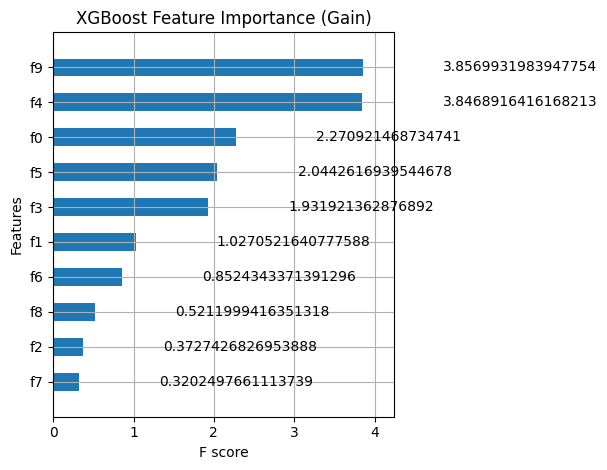

In [13]:
#Q.21  Train an XGBoost Classifier and visualize feature importance ?

import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate sample classification data
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 3: Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Plot Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', max_num_features=10, height=0.5)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()
